<!DOCTYPE html>
<html>
<head>
<style>
    .header-banner {
        background-color: white;
        color: black; 
        padding: 1rem; 
        font-family: 'Nunito', sans-serif;
    }
    .header-content {
        max-width: 2000px;
        margin: 0 auto;
        display: flex;
        align-items: center;
        gap: 2rem;
    }
    .logo {
        max-width: 160px;
    }
    .text-content {
        flex: 1;
    }
    .text-content h1 {
        font-size: 34px;
        margin: 0 0 10px;
        font-weight: 700;
        color: #7e4d02ff;
        border-bottom: 2px solid #e5c120ff;
        padding-bottom: 10px;
    }
    .text-content h2 {
        font-size: 21px;
        margin: 0 0 5px;
        font-weight: 600;
        color: #222;
    }
    .member-list {
        display: grid;
        grid-template-columns: repeat(2, auto);
        gap: 6px 40px;
        font-size: 17px;
        color: #444;
    }
    .member {
        position: relative;
        padding-left: 20px;
    }
</style>
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito:wght@400;700&display=swap" rel="stylesheet">
</head>
<body>

<header class="header-banner">
    <div class="header-content">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" alt="NOVA IMS Logo" class="logo">
        <div class="text-content">
            <h1>Cars 4 You: Expediting Car Evaluations with ML</h1>
            <h2>Group 37</h2>
            <div class="member-list">
                <div class="member">Filipa Pereira, 20240509</div>
                <div class="member">Gonçalo Silva, 20250354</div>
                <div class="member">Marta La Feria, 20211051 </div>
                <div class="member">Tomás Coroa, 20250394 </div>
            </div>
        </div>
    </div>
</header>

</body>
</html>

<div style="background-color:#f0f8ff; border-left:5px solid #1e90ffff; padding:12px 18px; border-radius:8px; font-family:sans-serif; font-size:14px; line-height:1.4; width:fit-content;">
<b style="color:#104e8b;"> FALTA:</b><br>

- SABER SE É CORR. SPEARMAN TB PARA AS CATEGÓRICAS <br>
- VER A QUESTÃO DO OHE EM KNN <br>
- Ter o textos todos acabados
- Imports só os necessários <br>
- PORQUÊ QUE TRANSMISSION OTHER ESTÁ ASSIM COM CORR=0? E O QUE É BRAND_NONE<br>

</div>

### Import Libraries

In [141]:
### APAGAR ### DEIXAR SÓ O QUE É PRECISO
import pandas as pd
import numpy as np

# Feature Selection- Filter Methods
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from itertools import combinations

# For plots
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.base import clone


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import Lasso

### Load Data

In [106]:
# Load the processed datasets (train, validation, test)
X_train = pd.read_parquet("./project_data/X_train_final.parquet", engine="pyarrow")
X_val   = pd.read_parquet("./project_data/X_val_final.parquet",   engine="pyarrow")
X_test  = pd.read_parquet("./project_data/X_test_final.parquet",  engine="pyarrow")

y_train = pd.read_parquet("./project_data/y_train.parquet", engine="pyarrow").squeeze("columns")
y_val   = pd.read_parquet("./project_data/y_val.parquet",   engine="pyarrow").squeeze("columns")


# Check the shape of the training, validation and test data
print(X_train.shape, X_val.shape, X_test.shape)
print('\n',y_train.shape, y_val.shape)

(60764, 18) (15191, 18) (32567, 18)

 (60764,) (15191,)


### Config

In [142]:
DATASETS = [X_train, X_val , X_test]

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.11 | Feature Selection</b></span>
    </h1>
</div>

We applied several Feature Selection techniques (including *Filter Methods*, *Wrapper Methods*, and *Embedded Methods*) to identify and remove **irrelevant** or **highly correlated** variables, reducing dimensionality and improving the model’s performance and interpretability.

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.1 |  Filter Methods</b></span>
    </h1>
</div>

##### **Variance Threshold**

In [143]:
# Get rid of variables with variance close to zero (<= 0.01)
vart = VarianceThreshold(threshold=0.01)

#fit
X_train_sel = vart.fit(X_train)

# Get low variance columns and print them
low_variance = X_train.columns[vart.variances_ <= 0.01]
print("Number of features with variance closer to zero:", len(low_variance))
print("Features with variance closer to zero:")
for col in low_variance:
    print(f"{col}: {vart.variances_[X_train.columns.get_loc(col)]:.4f}")

Number of features with variance closer to zero: 4
Features with variance closer to zero:
hasDamage: 0.0000
transmission_other: 0.0000
fuelType_electric: 0.0026
fuelType_other: 0.0044


We had already observed that the **`hasDamage`** variable was not particularly relevant. During imputation, all its non-null values were zeros, resulting in the variable being zero for every observation. This means it provides no useful information and can therefore be safely removed. Similarly, the variables **`transmission_other`**, **`fuelType_electric`**, and **`fuelType_other`** were also discarded, as they are almost always zero. These features were created through one-hot encoding and represent very rare categories, resulting in **near-zero variance** and minimal contribution to the model.

In [146]:
# Drop low variance columns from train, val and test sets
for d in [X_train, X_val , X_test]:
    d = d.drop(columns=low_variance, errors='ignore', inplace=True)

##### **Correlation Indices**

We chose to use **Spearman correlation** because, unlike Pearson, it can handle **non-linear relationships** and is **less sensitive to outliers**, which fits our data. Spearman measures how well the relationship between two variables can be described by a **monotonic** trend

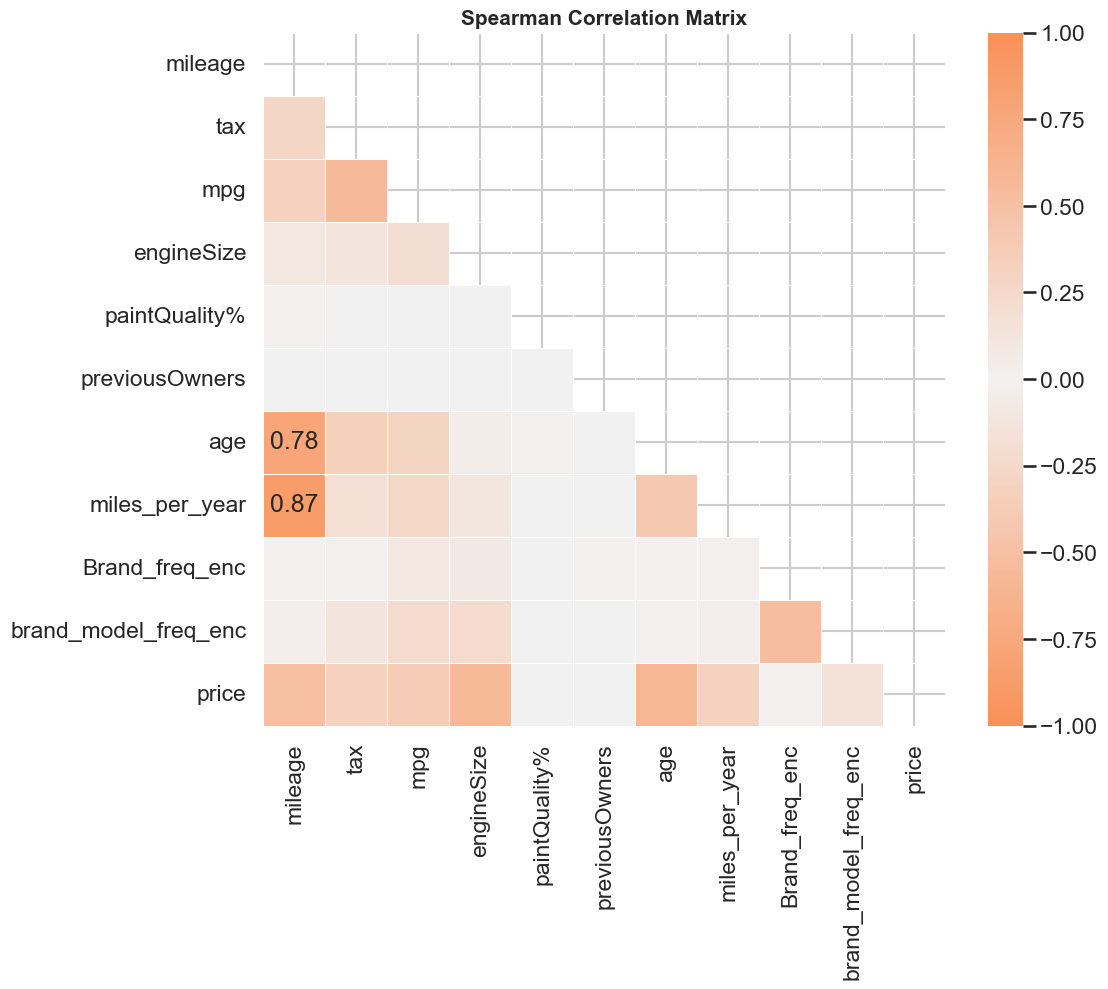

In [148]:
##### Spearman Correlation ####
cor = pd.concat([X_train_filtered, y_train], axis=1).corr(method='spearman').round(2)

# Create a custom diverging colormap based on orange tones
cmap = sns.diverging_palette(h_neg=30, h_pos=30, s=90, l=70, n=256, center="light", as_cmap=True) 

# Create a Mask to hide the upper triangle (to avoid redundancy)
mask = np.zeros_like(cor, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Only show values where absolute correlation is >= 0.6
mask_annot = np.absolute(cor.values) >= 0.6
annot = np.where(mask_annot, cor.values, np.full(cor.shape, ""))


# Plotting
plt.figure(figsize=(11, 9))
sns.heatmap(
    data=cor,
    mask=mask,              # Hide the upper triangle
    cmap=cmap,              # Custom divergent color map
    annot=annot,            # Show annotations only if |value| >= 0.6
    fmt='s',                # Format annotations as strings
    vmin=-1, vmax=1, center=0, # Ensure the scale is from -1 to 1, centered at 0
    linewidths=0.5, 
)

plt.title('Spearman Correlation Matrix', fontsize=15, fontweight='bold')
plt.show()

In [133]:
By the rule of thumb, two variables are considered **redundant** when their absolute correlation is **greater than or equal to 0.8**. This is the case for **`mileage`** and **`miles_per_year`**, which is expected since `miles_per_year` was derived from `mileage`. We decided to **drop `mileage`**, as `miles_per_year` captures more information and `mileage` is also **highly correlated with `age`**, which could lead to **multicollinearity issues** if kept in the model.

Variables highly correlated (|Spearman| > 0.9):


,var1,var2,corr
2394,Brand_None,brand_model_None_None,1.000000
1352,fuelType_freq_enc,fuelType_petrol,0.980609
1201,transmission_freq_enc,transmission_manual,0.954060


In [149]:
# Drop column 
high_corr = ['Brand_None','brand_model_None_None', 'fuelType_freq_enc','transmission_freq_enc'], 
for d in DATASETS:
    d = d.drop(columns=low_variance, errors='ignore', inplace=True)

In [150]:
X_train.shape

(60764, 53)

In [159]:
# look for irrelevant features with |correlation| < 0.1
cor_with_target = cor[y_train.name]
low_corr_features = cor_with_target[abs(cor_with_target) < 0.1].drop(y_train.name, errors='ignore') # Correlation with itself is 1, so we drop it

if not low_corr_features.empty:
    print(f"Found {len(low_corr_features)} variables with absolute correlation < 0.1:")
    # Sort by absolute value to see the least correlated ones first
    print(low_corr_features.abs().sort_values())
else:
    print(f"No variables found with absolute correlation < 0.1 with the target")

Found 3 variables with absolute correlation < 0.1:
paintQuality%     0.00
previousOwners    0.00
Brand_freq_enc    0.01
Name: price, dtype: float64


In [156]:
By the rule of thumb, features with an absolute correlation below **0.1** with the target variable are considered **irrelevant**, as they provide little to no predictive information. In our case, **`paintQuality%`**, **`previousOwners`**, and **`Brand_freq_enc`** show correlations below this threshold, indicating that they are unlikely to contribute meaningfully to the model’s performance and can therefore be **discarded**.

In [157]:
##### **Statistical Hypothesis Testing** 

(60764, 30)

In [72]:
# def TestIndependence(X_1, X_2):
#     # Build contingency table
#     dfObserved = pd.crosstab(X_1, X_2)
    
#     # Chi-square test
#     _, p, _, _ = stats.chi2_contingency(dfObserved.values)
    
#     # Interpret result: if p < 0.05, reject H0 (variables are not independent)
#     if p < 0.05:
#         result = f"The variables '{X_1.name}' and '{X_2.name}' are NOT independent (they are REDUNDANT)" # Reject H0 (H0: independent)
#     else:
#         result = f"The variables '{X_1.name}' and '{X_2.name}' are INDEPENDENT (they are NOT redundant)" # Fail to reject H0

#     print(result)

##### **Statistical Hypothesis Testing** 

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.2 |  Wrapper Methods</b></span>
    </h1>
</div>

In [103]:
# ============================================================================
# 2. RECURSIVE FEATURE ELIMINATION (RFE)
# ============================================================================

def rfe_selection(X, y, n_features=10, estimator=None):
    if estimator is None:
        estimator = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Aplicar RFE
    rfe = RFE(estimator=estimator, n_features_to_select=n_features)
    rfe.fit(X, y)
    
    # Obter nomes das features
    if isinstance(X, pd.DataFrame):
        feature_names = X.columns
    else:
        feature_names = [f'feature_{i}' for i in range(X.shape[1])]
    
    # Criar DataFrame com ranking
    ranking_df = pd.DataFrame({
        'feature': feature_names,
        'selected': rfe.support_,
        'ranking': rfe.ranking_
    }).sort_values('ranking')
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

NameError: name 'RFE' is not defined

In [ ]:
# Create Linear Regression model 
model = LinearRegression()

# Perform RFE
# Select features 
rfe = RFE(estimator=model, n_features_to_select=len(X_train_enc.columns) // 2)

# Extract Price Colum
y_train_flat = y_train['price']  

# Fit RFE 
rfe.fit(X_train_enc, y_train_flat)

# Get the selected features
selected_features_rfe = [col for col, support in zip(X_train_enc.columns, rfe.support_) if support]

# Print the number and names of selected features
print(f"Number of Selected Features (RFE): {len(selected_features_rfe)} / {len(X_train_enc.columns)}")
print("Selected Features (RFE):", selected_features_rfe)

NameError: name 'RFE' is not defined

In [160]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold

# REGRESSÃO (troca o estimador conforme o teu caso)
est = LinearRegression()  # ou Ridge()

sfs = SequentialFeatureSelector(
    est, n_features_to_select="auto", direction="forward", scoring="neg_mean_absolute_error",
    cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1
)
sfs.fit(X_train, y_train)
selected = X_train.columns[sfs.get_support()].tolist()


In [161]:
##  Decision Table

| Predictor | Spearman | RFE LR| RFE SVM | Lasso | What to do?  | 
| --- | --- | --- | --- |--- |---|
| VAR1 | Keep | Keep | Keep |Keep | Keep |
| VAR2 | Keep | Keep | Keep |Keep| Discard |
| VAR3 | Keep?| Discard | Discard |Keep ?| Discard |
| VAR4 | Keep | Keep | Keep | Keep | Keep |
| VAR5 | Keep? | Discard | Keep | Keep | Keep |

In [162]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.4 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.4 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.linear_model import LinearRegression

efs = ExhaustiveFeatureSelector(
    LinearRegression(), min_features=1, max_features=X_train.shape[1],
    scoring="neg_mean_absolute_error", cv=5, n_jobs=-1
)
efs = efs.fit(X_train.values, y_train.values)
selected_idx = list(efs.best_idx_)
selected = X_train.columns[selected_idx].tolist()


<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.3 |  Embedded Methods</b></span>
    </h1>
</div>

In [ ]:
# Create Lasso Regression model
# alpha controls regularization strength
model = Lasso(alpha=0.1, random_state=42)

# Fit Lasso model
model.fit(X_train, y_train.ravel()) 

# Get selected features (those with non-zero coefficients)
selected_features_lasso = [col for col, coef in zip(X_train.columns, model.coef_) if abs(coef) > 0]

# Print the number and names of selected features
print(f"Number of Selected Features (Lasso): {len(selected_features_lasso)} / {len(X_train.columns)}")
print("Selected Features (Lasso):", selected_features_lasso)


Number of Selected Features (Lasso): 8 / 9
Selected Features (Lasso): ['tax', 'mpg', 'engineSize', 'age', 'miles_per_year', 'transmission_freq_enc', 'fuelType_freq_enc', 'brand_model_freq_enc']


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_25856\3270030933.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())


In [ ]:

# ============================================================================
# 4. TABELA DE DECISÃO COMPLETA
# ============================================================================

def create_feature_decision_table(X_train, y_train, n_features=10, 
                                   corr_threshold_high=0.95, 
                                   corr_threshold_low=0.1,
                                   variance_threshold=0.01):
    
    feature_names = X_train.columns.tolist()
    results = []
    
    print("Calculando métricas de feature selection...\n")
    
    # ========================================================================
    # 1. CORRELAÇÃO COM TARGET
    # ========================================================================
    print("1. Calculando correlação com target...")
    corr_with_target = X_train.corrwith(pd.Series(y_train, index=X_train.index)).abs()
    
    # ========================================================================
    # 2. VARIÂNCIA
    # ========================================================================
    print("2. Calculando variância...")
    variances = X_train.var()
    
    # ========================================================================
    # 3. CORRELAÇÃO ALTA ENTRE FEATURES (redundância)
    # ========================================================================
    print("3. Verificando correlações altas entre features...")
    corr_matrix = X_train.corr().abs()
    
    # Para cada feature, verificar se tem correlação alta com outra
    high_corr_pairs = {}
    for feature in feature_names:
        # Encontrar features com correlação alta (excluindo consigo mesma)
        high_corr = corr_matrix[feature][corr_matrix[feature] > corr_threshold_high]
        high_corr = high_corr[high_corr.index != feature]
        if len(high_corr) > 0:
            high_corr_pairs[feature] = high_corr.index.tolist()
    
    # ========================================================================
    # 4. MUTUAL INFORMATION
    # ========================================================================
    print("4. Calculando Mutual Information...")
    mi_scores = mutual_info_regression(X_train, y_train, random_state=42)
    mi_ranking = pd.Series(mi_scores, index=feature_names).rank(ascending=False)
    
    # ========================================================================
    # 5. RFE com Linear Regression
    # ========================================================================
    print("5. Aplicando RFE com Linear Regression...")
    rfe_lr = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    rfe_lr.fit(X_train, y_train)
    rfe_lr_selected = rfe_lr.support_
    
    # ========================================================================
    # 6. RFE com SVM
    # ========================================================================
    print("6. Aplicando RFE com SVM...")
    rfe_svm = RFE(estimator=SVR(kernel='linear'), n_features_to_select=n_features)
    rfe_svm.fit(X_train, y_train)
    rfe_svm_selected = rfe_svm.support_
    
    # ========================================================================
    # 7. LASSO
    # ========================================================================
    print("7. Aplicando Lasso...")
    lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_coefs = np.abs(lasso.coef_)
    lasso_selected = lasso_coefs > 1e-5
    
    # ========================================================================
    # 8. SPEARMAN (correlação não-linear)
    # ========================================================================
    print("8. Calculando correlação Spearman...")
    spearman_corr = X_train.corrwith(pd.Series(y_train, index=X_train.index), 
                                      method='spearman').abs()
    
    # ========================================================================
    # CRIAR TABELA DE DECISÃO
    # ========================================================================
    print("\n9. Criando tabela de decisão...\n")
    
    for i, feature in enumerate(feature_names):
        # Verificar problemas
        low_variance = variances[feature] < variance_threshold
        low_corr = corr_with_target[feature] < corr_threshold_low
        has_high_corr = feature in high_corr_pairs
        
        # Contabilizar votos (quantos métodos selecionaram)
        votes = sum([
            spearman_corr[feature] >= spearman_corr.quantile(0.5),  # Top 50% Spearman
            mi_ranking[feature] <= n_features,  # Top N no MI
            rfe_lr_selected[i],  # RFE LR
            rfe_svm_selected[i],  # RFE SVM
            lasso_selected[i]  # Lasso
        ])
        
        # DECISÃO FINAL
        if low_variance:
            decision = "Discard"
            reason = "Low Variance"
        elif low_corr:
            decision = "Discard"
            reason = "Low Correlation with Target"
        elif has_high_corr and votes < 3:
            decision = "Discard?"
            reason = "Redundant (high corr with other features)"
        elif votes >= 4:
            decision = "Keep"
            reason = f"{votes}/5 methods selected"
        elif votes == 3:
            decision = "Keep?"
            reason = f"{votes}/5 methods selected"
        else:
            decision = "Discard"
            reason = f"Only {votes}/5 methods selected"
        
        results.append({
            'Predictor': feature,
            'Spearman': 'Keep' if spearman_corr[feature] >= spearman_corr.quantile(0.5) else 'Discard',
            'RFE_LR': 'Keep' if rfe_lr_selected[i] else 'Discard',
            'RFE_SVM': 'Keep' if rfe_svm_selected[i] else 'Discard',
            'Lasso': 'Keep' if lasso_selected[i] else 'Discard',
            'Pearson_Target': f"{corr_with_target[feature]:.3f}",
            'Spearman_Target': f"{spearman_corr[feature]:.3f}",
            'Variance': f"{variances[feature]:.3f}",
            'High_Corr_With': ', '.join(high_corr_pairs.get(feature, [])[:2]) if has_high_corr else '-',
            'MI_Rank': int(mi_ranking[feature]),
            'Votes': f"{votes}/5",
            'What_to_do?': decision,
            'Reason': reason
        })
    
    decision_df = pd.DataFrame(results)
    
    # Ordenar por número de votos (decrescente)
    decision_df['Votes_num'] = decision_df['Votes'].str.split('/').str[0].astype(int)
    decision_df = decision_df.sort_values('Votes_num', ascending=False)
    decision_df = decision_df.drop('Votes_num', axis=1)
    
    return decision_df


def plot_decision_summary(decision_df):
    """
    Cria visualizações do resumo da decisão
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Contagem de decisões
    decision_counts = decision_df['What_to_do?'].value_counts()
    axes[0, 0].bar(decision_counts.index, decision_counts.values, 
                   color=['green', 'orange', 'red', 'yellow'])
    axes[0, 0].set_title('Resumo das Decisões', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Número de Features')
    for i, v in enumerate(decision_counts.values):
        axes[0, 0].text(i, v + 0.5, str(v), ha='center', fontweight='bold')
    
    # 2. Distribuição de votos
    votes = decision_df['Votes'].str.split('/').str[0].astype(int)
    axes[0, 1].hist(votes, bins=range(0, 7), edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Distribuição de Votos (Métodos)', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Número de Métodos que Selecionaram')
    axes[0, 1].set_ylabel('Número de Features')
    axes[0, 1].set_xticks(range(0, 6))
    
    # 3. Top features por votos
    top_features = decision_df.head(15)
    y_pos = range(len(top_features))
    votes_top = top_features['Votes'].str.split('/').str[0].astype(int)
    colors_top = ['green' if v >= 4 else 'orange' if v == 3 else 'red' for v in votes_top]
    
    axes[1, 0].barh(y_pos, votes_top, color=colors_top, alpha=0.7)
    axes[1, 0].set_yticks(y_pos)
    axes[1, 0].set_yticklabels(top_features['Predictor'])
    axes[1, 0].set_xlabel('Votos')
    axes[1, 0].set_title('Top 15 Features por Votos', fontsize=14, fontweight='bold')
    axes[1, 0].invert_yaxis()
    
    # 4. Razões para descartar
    discard_reasons = decision_df[decision_df['What_to_do?'].isin(['Discard', 'Discard?'])]['Reason'].value_counts()
    if len(discard_reasons) > 0:
        axes[1, 1].barh(range(len(discard_reasons)), discard_reasons.values, color='salmon')
        axes[1, 1].set_yticks(range(len(discard_reasons)))
        axes[1, 1].set_yticklabels(discard_reasons.index, fontsize=9)
        axes[1, 1].set_xlabel('Número de Features')
        axes[1, 1].set_title('Razões para Descartar', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


# ============================================================================
# EXEMPLO DE USO COMPLETO
# ============================================================================

if __name__ == "__main__":
    
    print("="*80)
    print("EXEMPLO COM SEUS DADOS - X_train e y_train")
    print("="*80)
    print("\n# PASSO 1: Criar tabela de decisão")
    print("decision_table = create_feature_decision_table(")
    print("    X_train,")
    print("    y_train,")
    print("    n_features=10,")
    print("    corr_threshold_high=0.95,")
    print("    corr_threshold_low=0.1,")
    print("    variance_threshold=0.01")
    print(")")
    print("\n# PASSO 2: Ver a tabela")
    print("print(decision_table)")
    print("\n# PASSO 3: Pegar features recomendadas")
    print("features_keep = decision_table[decision_table['What_to_do?'] == 'Keep']['Predictor'].tolist()")
    print("\n# PASSO 4: Aplicar no treino e teste")
    print("X_train_selected = X_train[features_keep]")
    print("X_test_selected = X_test[features_keep]")
    print("\n# PASSO 5: Ver gráficos")
    print("plot_decision_summary(decision_table)")
    
    print("\n\n" + "="*80)
    print("EXECUTANDO EXEMPLO COM DADOS FICTÍCIOS")
    print("="*80 + "\n")
    
    # Gerar dados de exemplo
    np.random.seed(42)
    n_samples = 500
    n_features = 15
    
    # Criar features
    X = np.random.randn(n_samples, n_features)
    
    # Criar target com dependência apenas de algumas features
    y = 3*X[:, 0] + 2*X[:, 2] - 1.5*X[:, 5] + np.random.randn(n_samples)*0.5
    
    # Adicionar problemas
    X[:, 10] = 1.5  # Baixa variância
    X[:, 12] = X[:, 2] + np.random.randn(n_samples)*0.01  # Redundante
    
    # Converter para DataFrame
    feature_names = [f'VAR{i+1}' for i in range(n_features)]
    X_train = pd.DataFrame(X, columns=feature_names)
    y_train = y
    
    # CRIAR TABELA DE DECISÃO
    decision_table = create_feature_decision_table(
        X_train, 
        y_train, 
        n_features=10,
        corr_threshold_high=0.90,
        corr_threshold_low=0.05,
        variance_threshold=0.01
    )
    
    # Mostrar tabela
    print("\n" + "="*120)
    print("TABELA DE DECISÃO - FEATURE SELECTION")
    print("="*120)
    print(decision_table[['Predictor', 'Spearman', 'RFE_LR', 'RFE_SVM', 'Lasso', 'What_to_do?']].to_string(index=False))
    
    # Resumo
    print("\n" + "="*120)
    print("RESUMO")
    print("="*120)
    keep = len(decision_table[decision_table['What_to_do?'] == 'Keep'])
    keep_maybe = len(decision_table[decision_table['What_to_do?'] == 'Keep?'])
    discard_maybe = len(decision_table[decision_table['What_to_do?'] == 'Discard?'])
    discard = len(decision_table[decision_table['What_to_do?'] == 'Discard'])
    
    print(f"✅ Keep: {keep} features")
    print(f"❓ Keep?: {keep_maybe} features")
    print(f"⚠️  Discard?: {discard_maybe} features")
    print(f"❌ Discard: {discard} features")
    
    # Features recomendadas
    recommended = decision_table[decision_table['What_to_do?'] == 'Keep']['Predictor'].tolist()
    print(f"\n📋 Features recomendadas: {recommended}")
    
    # Plotar resumo
    plot_decision_summary(decision_table)


AttributeError: 'LinearRegression' object has no attribute 'coef_'

| Predictor | Spearman | RFE LR| RFE SVM | Lasso | What to do?  | 
| --- | --- | --- | --- |--- |---|
| VAR1 | Keep | Keep | Keep |Keep | Keep |
| VAR2 | Keep | Keep | Keep |Keep| Discard |
| VAR3 | Keep?| Discard | Discard |Keep ?| Discard |
| VAR4 | Keep | Keep | Keep | Keep | Keep |
| VAR5 | Keep? | Discard | Keep | Keep | Keep |
# <span style="color: #ffffff;">3 | Regression Benchmarking</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>3 | Regression Benchmarking</b></span>
    </h1>
</div>

<br>
<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
PASSOS A SEGUIR: <BR>
- Explanation of model assessment strategy and metrics used
- Feature Selection Strategy and results
- Comparison of performance between candidate models
<br><br>
 - Identify the type of problem and select the relevant algorithms.
 - Select one model assessment strategy to use throughout your work. Which metrics are you using to evaluate your model and why?
 - Train at least 1 model using the train dataset and obtain predictions for the test dataset.(Extra 1 point) Be on the Top-5 Best Groups in the Kaggle Competition
</div>


We are dealing with a **supervised regression problem**, as the target variable `price` is **numerical and continuous**. The goal is to train a model that learns the relationship between car characteristics (`Brand`, `model`, `mileage`, `year`, ...) and `price`, allowing it to predict the value of unseen cars.

Both **linear models** (e.g., *Linear Regression*, *Ridge*, *ElasticNet*) and **non-linear models** (e.g., *KNN*, *Decision Tree*, *SVR*) can be applied. In this problem, we focus on predicting the **median price** because car prices often include **outliers or extreme values** that could skew mean-based predictions. The **median is robust** to such extremes, providing more reliable predictions for typical cars.

For this reason, **median-based loss functions** such as *MAE* (Mean Absolute Error) or *Pinball Loss* with α = 0.5 are most appropriate, as they are **strictly consistent for the median functional**. We will use *MAE* as the primary metric, in line with the Kaggle competition, while monitoring other metrics to track overall model performance.




<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

O STOR DISSE QUE UM DOS PASSOS MAIS ESSENCIAIS É ESCOLHER BEM A **FITNESS F.**:    
O AI DEU-ME ISTO:

**Huber Loss** (A escolha padrão e mais recomendada):<BR>
Como funciona: É um híbrido. Para erros pequenos, comporta-se como o Erro Quadrático Médio (MSE), sendo eficiente. Para erros grandes (causados por outliers), comporta-se como o Erro Absoluto Médio (MAE), sendo robusto.
Como usar: Use modelos que a implementam diretamente, como HuberRegressor em scikit-learn.

**Erro Absoluto Médio** (MAE ou L1 Loss):<BR>
Como funciona: Penaliza o erro linearmente, não quadraticamente. Um outlier tem uma influência proporcional, não desproporcional.
Como usar: Use modelos como Lasso ou SGDRegressor(loss='epsilon_insensitive').

- TEMOS QUE USAR A MEDIDA QUE O PROF DIZ LÁ NO KAAGLE QUE NOS VAI AVALIAR MAS AS OUTRAS TEMOS DE TER UMA BOA JUSTIFICAÇÃO E NÃO USAR R^2 PORQUE É TIPO A PIOR MEDIDA!!!

DIZER PORQUÊ QUE UM MODELO É MELHOR COM OUTRO EM TERMOS DE PERFORMANCE

In [158]:
# Model definitions
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "KNeighbors": KNeighborsRegressor()
}

# Dictionary to store results
results = {}

# Iterate over each model
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred   = model.predict(X_val)

    # Calculate metrics
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val   = mean_absolute_error(y_val, y_val_pred)
    rmse_val  = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val    = r2_score(y_val, y_val_pred)

    # Store results
    results[model_name] = {
        "MAE_train": mae_train,
        "MAE_val": mae_val
    }

    # Print results
    print(f"{model_name} — MAE (train): {mae_train:.4f}, MAE (val): {mae_val:.4f}")
    print("-" * 60)

# Summary table
results_df = pd.DataFrame(results).T
display(results_df)


Training LinearRegression...
LinearRegression — MAE (train): 3024.5465, MAE (val): 3030.0093
------------------------------------------------------------
Training Ridge...
Ridge — MAE (train): 3027.0389, MAE (val): 3030.6818
------------------------------------------------------------
Training Lasso...
Lasso — MAE (train): 3029.0598, MAE (val): 3032.3839
------------------------------------------------------------
Training RandomForest...
RandomForest — MAE (train): 515.5079, MAE (val): 1385.0958
------------------------------------------------------------
Training GradientBoosting...
GradientBoosting — MAE (train): 2165.3451, MAE (val): 2227.7033
------------------------------------------------------------
Training DecisionTree...
DecisionTree — MAE (train): 13.0027, MAE (val): 1723.1456
------------------------------------------------------------
Training KNeighbors...
KNeighbors — MAE (train): 1385.4594, MAE (val): 1759.2688
----------------------------------------------------------

,MAE_train,MAE_val
LinearRegression,3024.546472,3030.009280
Ridge,3027.038912,3030.681836
Lasso,3029.059760,3032.383884
RandomForest,515.507879,1385.095845
GradientBoosting,2165.345139,2227.703312
DecisionTree,13.002661,1723.145618
KNeighbors,1385.459433,1759.268764
